<h1><center><b> MAGNET: A Lightweight DNN and SensorFusion based Time Series Classification for Indoor Outdoor Detection</center></h1></b>

<h2><b>  Author:</h2></b> 

        Bilal Dastagir     

## Mount Google Colab

In [3]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    dataset_Path = '/content/gdrive/MyDrive/Datasets/magnet/'
    model_Path = '/content/gdrive/MyDrive/models/magnet/'
except:
    dataset_Path = '/home/bilz/magnet/dataset/'
    model_Path = '/home/bilz/magnet/models/'

dataset_Path_MAGNET = dataset_Path + 'magnetData.csv'
DATA_PATH = dataset_Path_MAGNET
print(DATA_PATH)

/home/bilz/magnet/dataset/magnetData.csv


<h2><b>  Importing all the necessary libraries </h2></b> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as stats
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import warnings
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
#Printing the version of TensorFlow in use
print(tf.__version__)  

2023-04-24 17:40:44.748092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 17:40:44.845011: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-24 17:40:44.845030: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-24 17:40:45.207388: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2.11.0


## MAGNET: A Lightweight DNN and SensorFusion based Time Series Classification for Indoor Outdoor Detection .

<h2><b> Pre-processing of the Dataset </b></h2>

In [3]:
# load the original CSV file into a DataFrame
df = pd.read_csv(DATA_PATH)
print(df.head())

   index   state     timestamp      mag-z    mag-y    mag-x     acc-z  \
0      1  Indoor  1.680000e+18 -42.937500 -4.48125  6.05625  0.244359   
1      2  Indoor  1.680000e+18 -42.937500 -4.48125  6.05625  0.229561   
2      3  Indoor  1.680000e+18 -42.187500 -4.44375  6.45000  0.223114   
3      4  Indoor  1.680000e+18 -42.187500 -4.44375  6.45000  0.201526   
4      5  Indoor  1.680000e+18 -42.393753 -4.10625  6.15000  0.153779   

      acc-y     acc-x    gyro-z    gyro-y    gyro-x  
0  0.034834  0.077173 -0.067957 -0.048410 -0.019700  
1  0.008512  0.062387 -0.081395 -0.047799 -0.008705  
2 -0.032783  0.058086 -0.087504 -0.038636 -0.000764  
3 -0.042683  0.089896 -0.087504 -0.059405  0.002291  
4 -0.027008  0.056276 -0.085060 -0.060627  0.001069  


In [4]:
columns = ['index','state','timestamp','mag-z','mag-y','mag-x','acc-z','acc-y','acc-x','gyro-z','gyro-y','gyro-x']
data = pd.DataFrame(data = df, columns = columns)
print('Shape of the data:', data.shape)
# Converting the string formatted data into float
data['mag-z'] = data['mag-z'].astype('float')
data['mag-y'] = data['mag-y'].astype('float')
data['mag-x'] = data['mag-x'].astype('float')
data['acc-z'] = data['acc-z'].astype('float')
data['acc-y'] = data['acc-y'].astype('float')
data['acc-x'] = data['acc-x'].astype('float')
data['gyro-z'] = data['gyro-z'].astype('float')
data['gyro-y'] = data['gyro-y'].astype('float')
data['gyro-x'] = data['gyro-x'].astype('float')
Fs = 20 # Number of Frames
states = data['state'].value_counts().index

Shape of the data: (1230567, 12)


### Ploting the Dataset

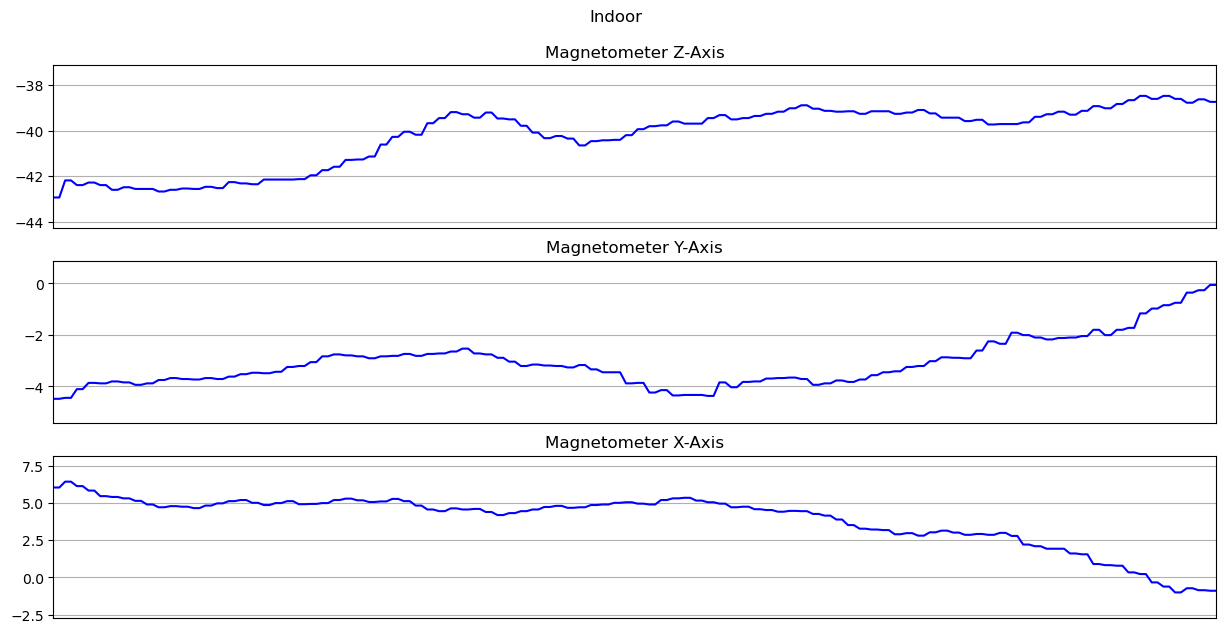

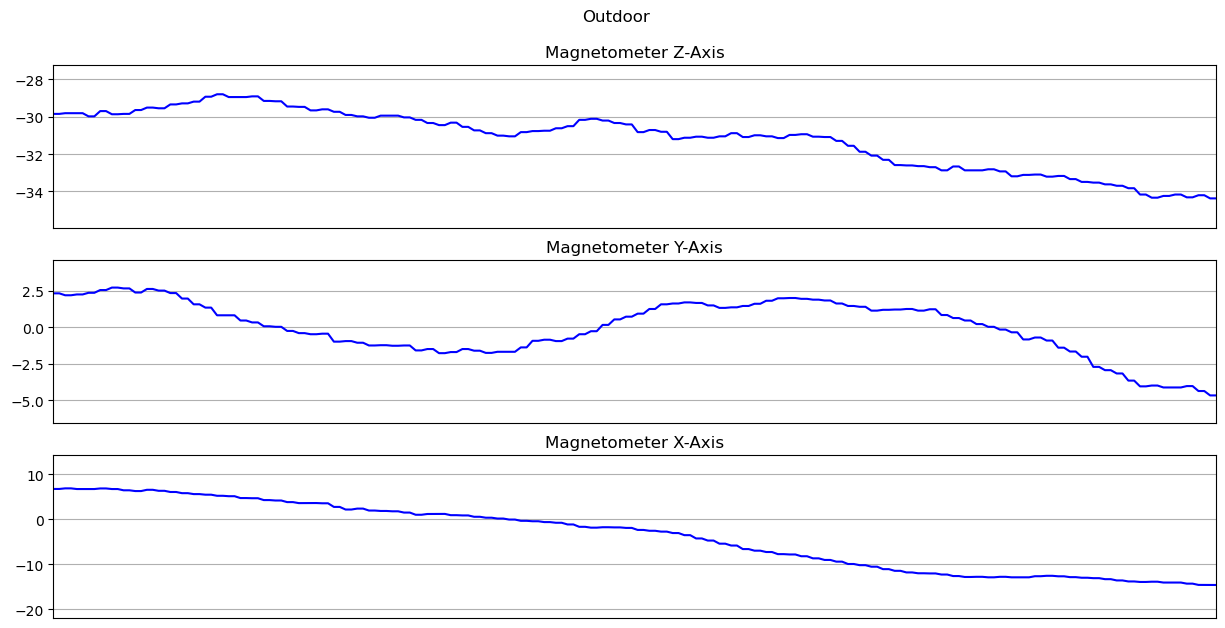

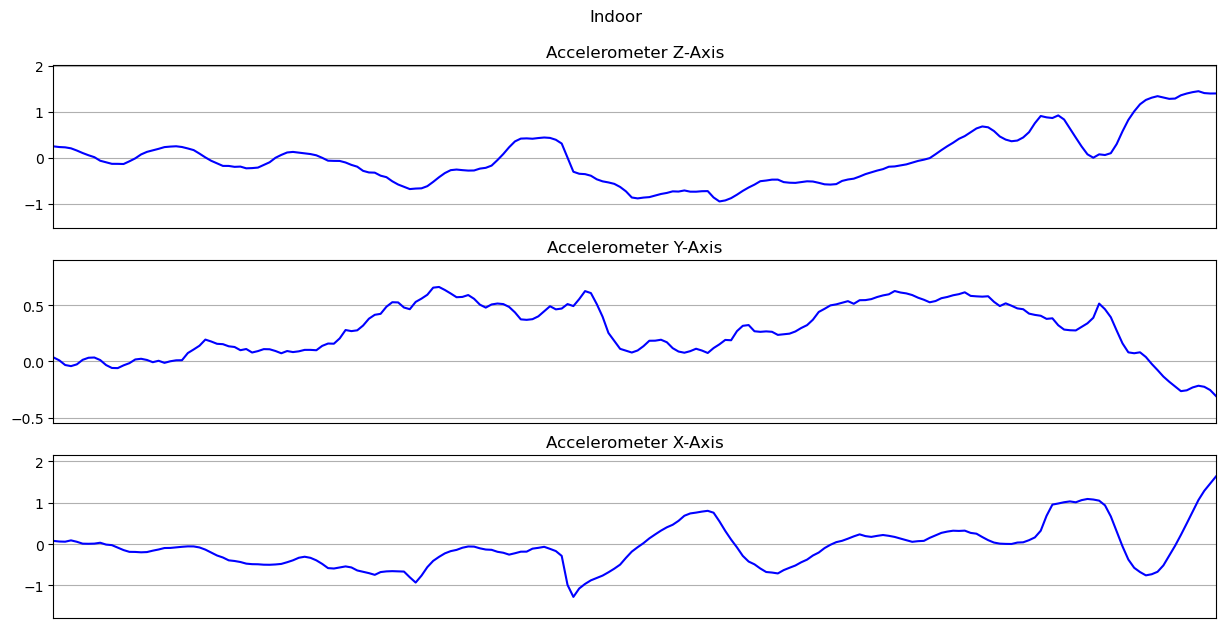

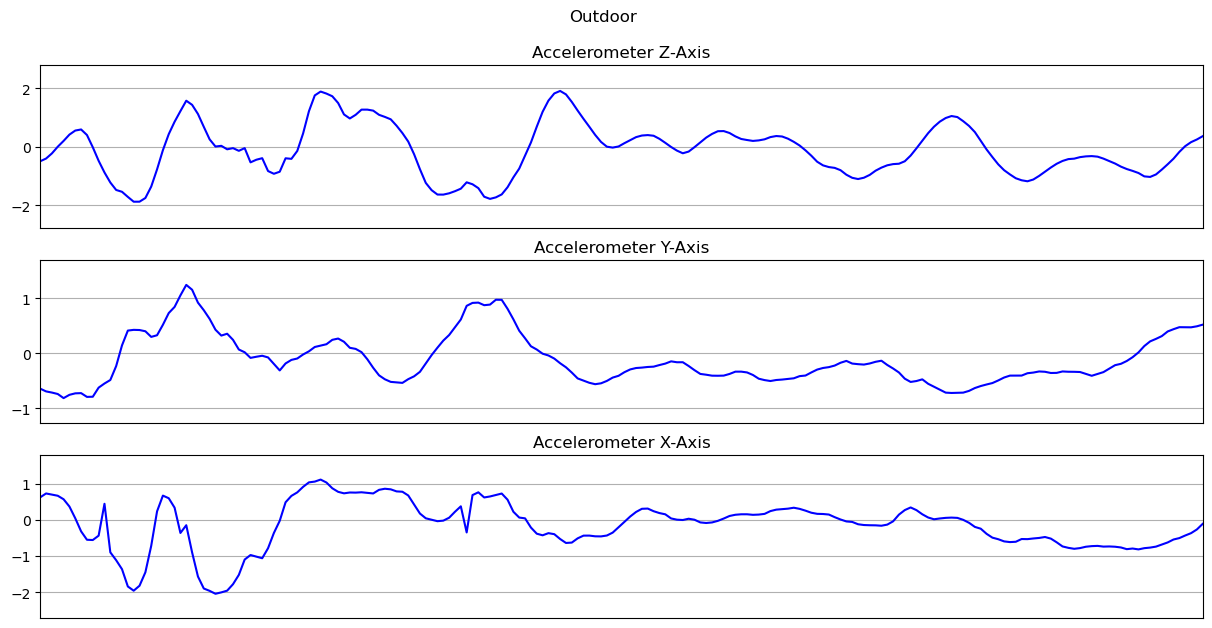

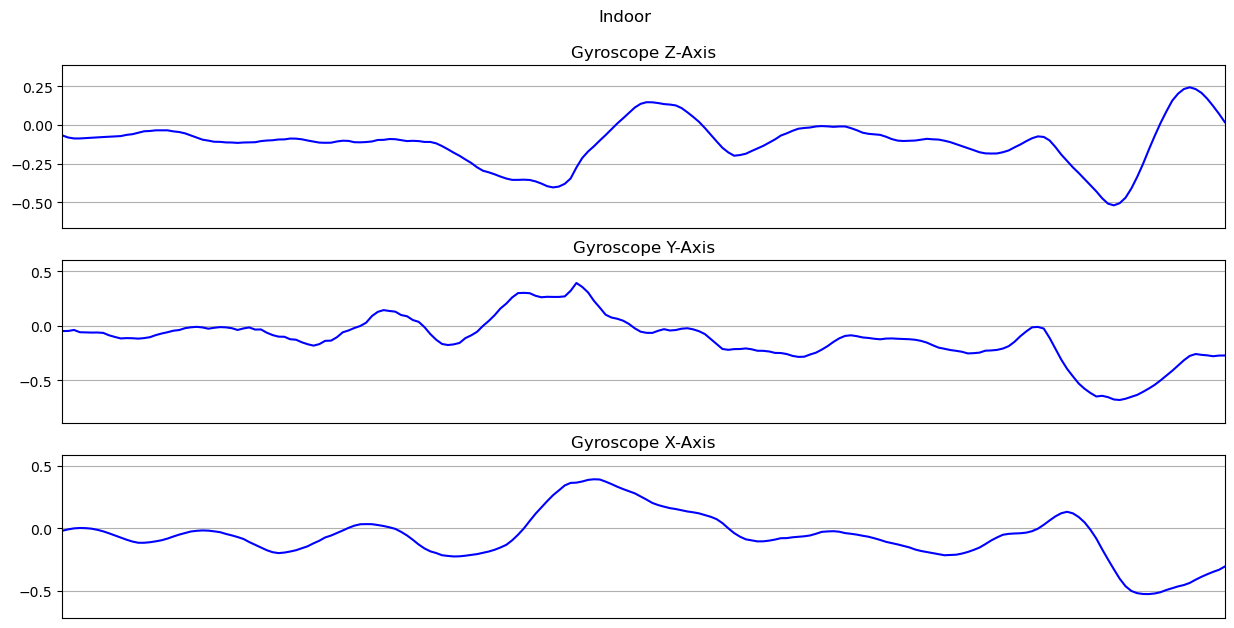

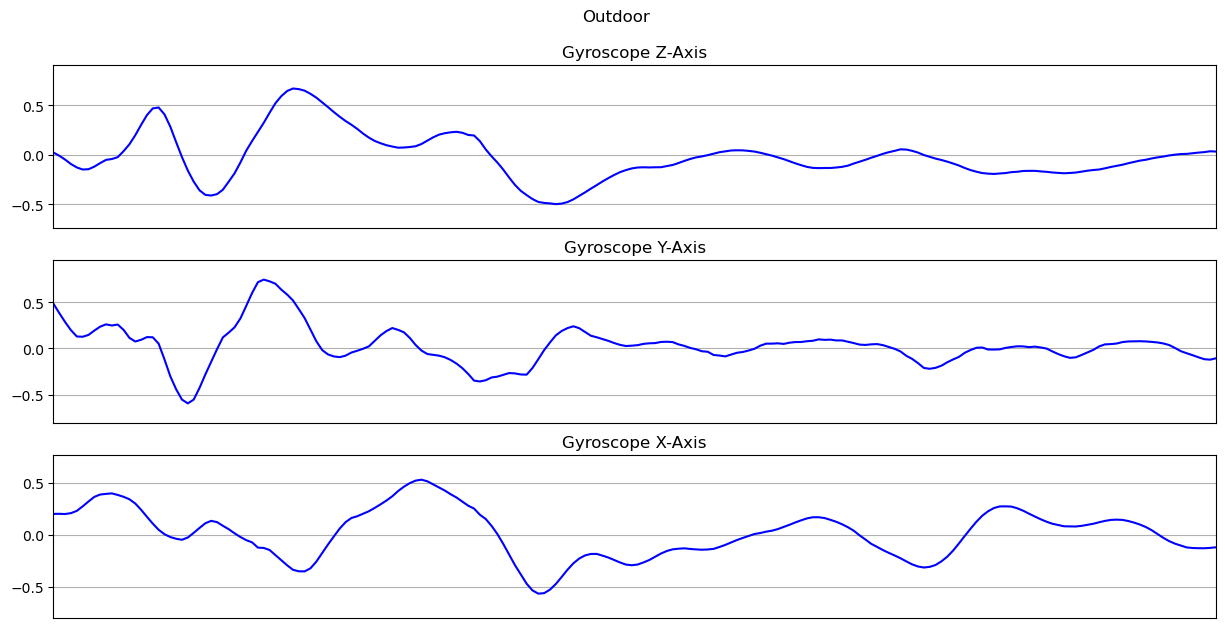

In [5]:
def plot_state(state, data):
    fig, (mx0, mx1, mx2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(mx0, data['index'], data['mag-z'], 'Magnetometer Z-Axis')
    plot_axis(mx1, data['index'], data['mag-y'], 'Magnetometer Y-Axis')
    plot_axis(mx2, data['index'], data['mag-x'], 'Magnetometer X-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(state)
    plt.subplots_adjust(top=0.90)
    plt.show()

   

def plot_axis(mx, x, y, title):
    mx.plot(x, y, 'b')
    mx.set_title(title)
    mx.xaxis.set_visible(False)
    mx.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    mx.set_xlim([min(x), max(x)])
    mx.grid(True)

for state in states:
    data_for_plot = data[(data['state'] == state)][:Fs*10]
    plot_state(state, data_for_plot)

def plot_state(state, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['index'], data['acc-z'], 'Accelerometer Z-Axis')
    plot_axis(ax1, data['index'], data['acc-y'], 'Accelerometer Y-Axis')
    plot_axis(ax2, data['index'], data['acc-x'], 'Accelerometer X-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(state)
    plt.subplots_adjust(top=0.90)
    plt.show()

   

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'b')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for state in states:
    data_for_plot = data[(data['state'] == state)][:Fs*10]
    plot_state(state, data_for_plot)

def plot_state(state, data):
    fig, (gx0, gx1, gx2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(gx0, data['index'], data['gyro-z'], 'Gyroscope Z-Axis')
    plot_axis(gx1, data['index'], data['gyro-y'], 'Gyroscope Y-Axis')
    plot_axis(gx2, data['index'], data['gyro-x'], 'Gyroscope X-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(state)
    plt.subplots_adjust(top=0.90)
    plt.show()

   

def plot_axis(mx, x, y, title):
    mx.plot(x, y, 'b')
    mx.set_title(title)
    mx.xaxis.set_visible(False)
    mx.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    mx.set_xlim([min(x), max(x)])
    mx.grid(True)

for state in states:
    data_for_plot = data[(data['state'] == state)][:Fs*10]
    plot_state(state, data_for_plot)

Here the MAGNET dataset has an un-equal nuber of values is each label. Hence we need to balance the dataset, otherwise their is a possibility of overfitting for certain labels or low accuracy for certain labels.

###  Balancing the Dataset

As observed "Indoor" has the most values, whereas the label "Outdoor" has the least

In [6]:
df = data.drop(['index', 'timestamp'], axis = 1).copy()
df['state'].value_counts()

Indoor     699739
Outdoor    530828
Name: state, dtype: int64

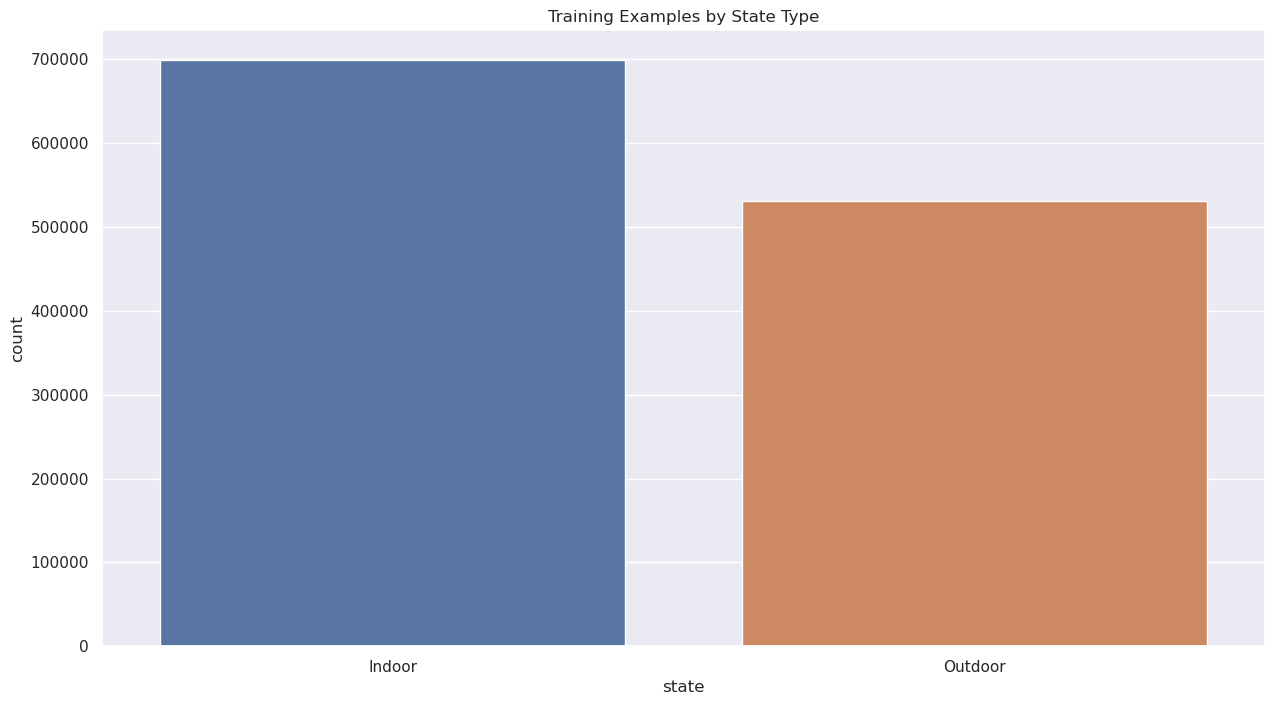

In [7]:
# Analyzing Class Label Distribution
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x = 'state', data = df)
plt.title('Training Examples by State Type')
plt.show()

Since "Outdoor" has the least quantity of data, we have taken it as a reference for balancing 

In [8]:
Outdoor = df[df['state'] == 'Outdoor'].copy()
Indoor = df[df['state'] == 'Indoor'].head(530828).copy()

In [9]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Outdoor, Indoor])
balanced_data.shape

(1061656, 10)

In [10]:
# Displaying the balanced data
print('State Count:',balanced_data['state'].value_counts())

State Count: Outdoor    530828
Indoor     530828
Name: state, dtype: int64


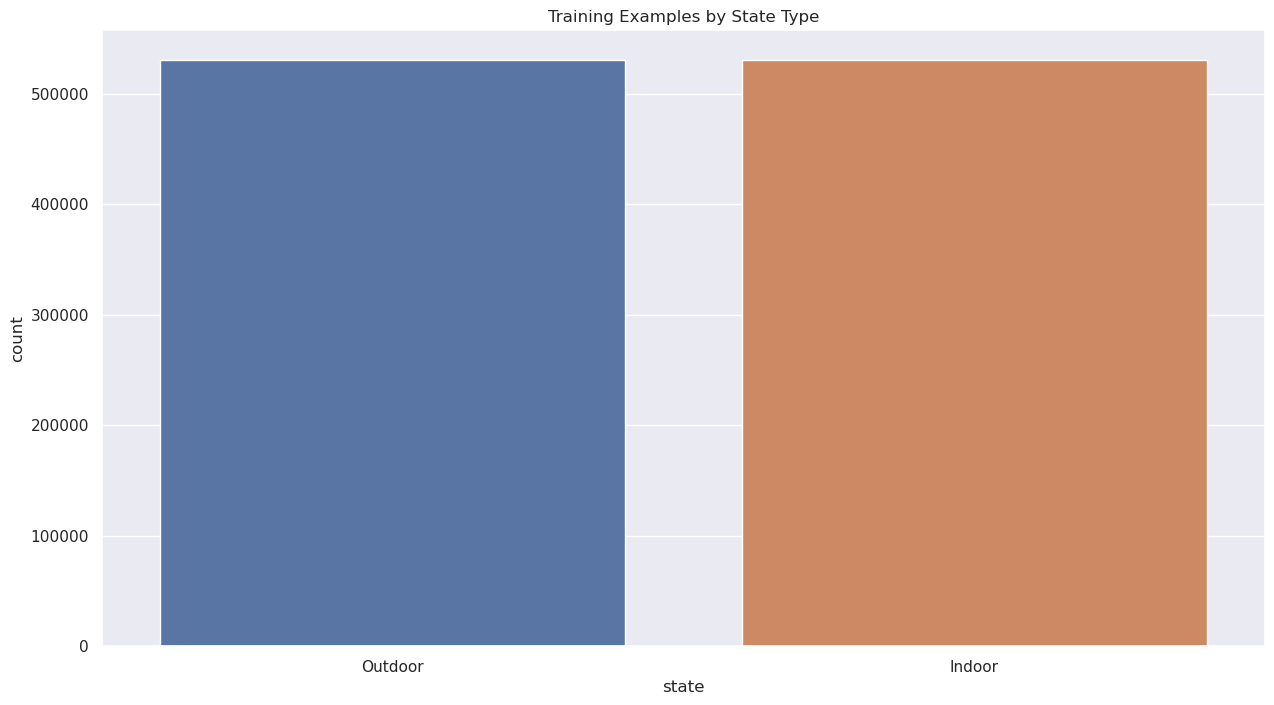

In [11]:
# Analyzing Class Label Distribution
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x = 'state', data = balanced_data)
plt.title('Training Examples by State Type')
plt.show()

In [12]:
# Encoding the Data with suitable labels
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['state'])
balanced_data.head()

,state,mag-z,mag-y,mag-x,acc-z,acc-y,acc-x,gyro-z,gyro-y,gyro-x,label
615056,Outdoor,-29.850000,2.30625,6.76875,-0.496039,-0.642663,0.620323,0.021761,0.484020,0.201809,1
615057,Outdoor,-29.850000,2.30625,6.76875,-0.404016,-0.692411,0.727258,-0.010003,0.382619,0.202420,1
615058,Outdoor,-29.812502,2.17500,6.90000,-0.228154,-0.713446,0.695428,-0.049097,0.285495,0.200587,1
615059,Outdoor,-29.812502,2.17500,6.90000,0.000651,-0.739677,0.664212,-0.093689,0.197533,0.209139,1
615060,Outdoor,-29.812502,2.23125,6.75000,0.199010,-0.814597,0.567077,-0.127896,0.129729,0.231129,1


### Standardizing the Dataset

In [13]:
X = balanced_data[['mag-z','mag-y','mag-x','acc-z','acc-y','acc-x','gyro-z','gyro-y','gyro-x']]
y = balanced_data['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['mag-z','mag-y','mag-x','acc-z','acc-y','acc-x','gyro-z','gyro-y','gyro-x'])
scaled_X['label'] = y.values

scaled_X

,mag-z,mag-y,mag-x,acc-z,acc-y,acc-x,gyro-z,gyro-y,gyro-x,label
0,-0.869137,0.635887,0.405753,-0.517265,-0.712834,0.707775,0.045720,1.216997,0.499499,1
1,-0.869137,0.635887,0.405753,-0.430168,-0.777701,0.829877,-0.025594,0.960250,0.501028,1
2,-0.867541,0.629642,0.411120,-0.263720,-0.805129,0.793532,-0.113364,0.714330,0.496441,1
3,-0.867541,0.629642,0.411120,-0.047163,-0.839332,0.757889,-0.213478,0.491610,0.517849,1
4,-0.867541,0.632318,0.404986,0.140579,-0.937023,0.646977,-0.290277,0.319930,0.572900,1
...,...,...,...,...,...,...,...,...,...,...
1061651,-1.633647,0.775973,-0.551260,0.249971,-0.435865,-2.166530,-1.353293,-0.012217,-0.046615,0
1061652,-1.644820,0.776865,-0.550493,0.302092,-0.525969,-2.287590,-1.350550,-0.123578,0.019141,0
1061653,-1.644820,0.776865,-0.550493,0.339360,-0.608265,-2.327967,-1.372493,-0.221018,0.101717,0
1061654,-1.653598,0.783111,-0.554328,0.312230,-0.676848,-2.318422,-1.384836,-0.346298,0.201115,0


In [14]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

def get_frames(df, frame_size, hop_size):

    N_FEATURES = 9

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        mag_z = df['mag-z'].values[i: i + frame_size]
        mag_y = df['mag-y'].values[i: i + frame_size]
        mag_x = df['mag-x'].values[i: i + frame_size]
        acc_z = df['acc-z'].values[i: i + frame_size]
        acc_y = df['acc-y'].values[i: i + frame_size]
        acc_x = df['acc-x'].values[i: i + frame_size]
        gyro_z = df['gyro-z'].values[i: i + frame_size]
        gyro_y = df['gyro-y'].values[i: i + frame_size]
        gyro_x = df['gyro-x'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([mag_z, mag_y, mag_x, acc_z, acc_y, acc_x, gyro_z, gyro_y, gyro_x])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [15]:
scaled_X = scaled_X.replace([np.inf, -np.inf], np.nan)
scaled_X = scaled_X.dropna()
scaled_X = scaled_X.reset_index()
X, y = get_frames(scaled_X, frame_size, hop_size)
X.shape, y.shape

((26540, 80, 9), (26540,))

In [16]:
scaled_X.shape

(1061656, 11)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21232, 80, 9), (5308, 80, 9), (21232,), (5308,))

In [18]:
import numpy as npt
npt.savetxt('X_test.csv', X_test.reshape(X_test.shape[0], -1), delimiter=',')
npt.savetxt('y_test.csv', y_test, delimiter=',')


In [19]:
from keras.layers import Input
verbose = 1
epochSize = 100
batch_size = 50

n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = 2#y_train.shape[1]

input_shape=(n_timesteps,n_features)
inputs = Input(shape=input_shape)

print("input_shape = ",input_shape)
print("n_outputs = ",n_outputs)

input_shape =  (80, 9)
n_outputs =  2


<h2><b>Propose MAGNET Model</h2></b>

In [23]:
from transformers import BartForSequenceClassification, BartTokenizer
from tensorflow import keras
from keras.layers import Input, Dense, Dropout, LayerNormalization, Conv1D
from keras.models import Model

# Define the time series classification model with Conv1D and BART
def magnetTransformer(input_shape, n_outputs):
    inputs = Input(shape=input_shape)

    # Apply Conv1D to input sequence
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = LayerNormalization()(x)

    # Use BART pre-trained model for sequence classification
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
    bart_model = BartForSequenceClassification.from_pretrained('facebook/bart-base', num_labels=n_outputs)

    # Tokenize and encode input sequence
    tokenized_input = tokenizer(inputs, padding=True, truncation=True, return_tensors='tf')
    encoded_input = {k: tf.squeeze(v) for k, v in tokenized_input.items()}

    # Pass the encoded input sequence to the BART model
    output = bart_model(encoded_input).logits

    # Create and compile the model
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [20]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout, LayerNormalization, Conv1D, LSTM
from keras.layers import MultiHeadAttention, MaxPooling1D, GlobalAveragePooling1D, concatenate
from keras.models import Model

# Define the three base models
def CNN(input_shape, n_outputs):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = LayerNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)
    x = LayerNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(n_outputs, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

def CNN_LSTM(input_shape, n_outputs):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = LayerNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = LSTM(64)(x)
    x = Dropout(0.2)(x)
    outputs = Dense(n_outputs, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

def CNN_MultiHead(input_shape, n_outputs):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = LayerNormalization()(x)
    x = MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
    x = Dropout(0.2)(x)
    x = LayerNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)
    x = LayerNormalization()(x)
    x = MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
    x = Dropout(0.2)(x)
    x = LayerNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(n_outputs, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [37]:
def CNN_LSTM(input_shape, n_outputs):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = LayerNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = LSTM(64)(x)
    x = Dropout(0.2)(x)
    outputs = Dense(n_outputs, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [41]:
from keras.layers import Input, Dense, Dropout, LayerNormalization, Conv1D, LSTM
from keras.layers import MultiHeadAttention, MaxPooling1D, GlobalAveragePooling1D, concatenate
from keras.models import Model

def voter_models():
    input_voter = Input(shape=(3, n_outputs))
    x = concatenate([input_voter[:, 0], input_voter[:, 1], input_voter[:, 2]])
    outputs = Dense(n_outputs, activation='softmax')(x)
    return Model(inputs=input_voter, outputs=outputs)

def TMRNet(input_shape, n_outputs):
    # Create three base models
    cnn_model = CNN(input_shape, n_outputs)
    cnn_lstm_model = CNN_LSTM(input_shape, n_outputs)
    cnn_multihead_model = CNN_MultiHead(input_shape, n_outputs)

    # Create the voter circuit
    voter_circuit = voter_models()
    voter_input = Input(shape=input_shape)
    voter_output = voter_circuit(voter_input)
    voter_model = Model(inputs=voter_input, outputs=voter_output)

    # Create the TMRNet model
    input_tmr = Input(shape=(3, input_shape))
    cnn_output = cnn_model(input_tmr)
    cnn_lstm_output = cnn_lstm_model(input_tmr)
    cnn_multihead_output = cnn_multihead_model(input_tmr)

    # Apply the voter circuit to the outputs of the three base models
    voter_input = concatenate([cnn_output, cnn_lstm_output, cnn_multihead_output])
    voter_input = keras.backend.expand_dims(voter_input, axis=1)
    voter_output = voter_circuit(voter_input[:, 0, :]) 
    voter_output = keras.backend.squeeze(voter_output, axis=1)

    # Create and compile the TMRNet model
    outputs = Dense(n_outputs, activation='softmax')(voter_output)
    model = Model(inputs=input_tmr, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = TMRNet(input_shape, n_outputs)


ValueError: Exception encountered when calling layer "model_42" (type Functional).

Input 0 of layer "dense_39" is incompatible with the layer: expected axis -1 of input shape to have value 6, but received input with shape (None, 27)

Call arguments received by layer "model_42" (type Functional):
  • inputs=tf.Tensor(shape=(None, 80, 9), dtype=float32)
  • training=None
  • mask=None

In [28]:


# Define the TMRNet model
def TMRNet(input_shape, n_outputs):
    # Create three base models
    cnn_model = CNN(input_shape, n_outputs)
    cnn_lstm_model = CNN_LSTM(input_shape, n_outputs)
    cnn_multihead_model = CNN_MultiHead(input_shape, n_outputs)

    # Create the voter circuit
    input_voter = Input(shape=(3, n_outputs))
    x = concatenate([input_voter[:, 0], input_voter[:, 1], input_voter[:, 2]])
    outputs = Dense(n_outputs, activation='softmax')(x)
    voter_model = Model(inputs=input_voter, outputs=outputs)

    # Create the TMRNet model
    input_tmr = Input(shape=input_shape)
    cnn_output = cnn_model(input_tmr)
    cnn_lstm_output = cnn_lstm_model(input_tmr)
    cnn_multihead_output = cnn_multihead_model(input_tmr)

    # Apply the voter circuit to the outputs of the three base models
    voter_input = concatenate([cnn_output, cnn_lstm_output, cnn_multihead_output])
    voter_input = keras.backend.expand_dims(voter_input, axis=1)
    voter_output = voter_model(voter_input[:, 0, :]) 
    voter_output = keras.backend.squeeze(voter_output, axis=1)

    # Create and compile the TMRNet model
    tmr_output = keras.layers.Average()([cnn_output, cnn_lstm_output, cnn_multihead_output, voter_output])
    tmr_output = keras.layers.Dense(n_outputs, activation='softmax')(tmr_output)
    tmr_model = Model(inputs=input_tmr, outputs=tmr_output)
    tmr_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return tmr_model



In [38]:
model = CNN_LSTM(input_shape, n_outputs)

In [39]:
opt_adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [40]:
model.compile(optimizer=opt_adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
from keras.callbacks import ModelCheckpoint


# Define the filepath for the saved model
filepath = model_Path + 'trainedModel_MAGNET_CNN_LSTM_V1.h5'

# Define a checkpoint to monitor the validation accuracy and save the best model
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the checkpoint callback
history = model.fit(X_train, y_train, epochs=epochSize, validation_data=(X_test, y_test), callbacks=[checkpoint], verbose=1)


Epoch 1/100
662/664 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8899
Epoch 1: val_accuracy improved from -inf to 0.93218, saving model to /home/bilz/magnet/models/trainedModel_MAGNET_CNN_LSTM_V1.h5
664/664 [==============================] - 10s 14ms/step - loss: 0.2891 - accuracy: 0.8900 - val_loss: 0.2139 - val_accuracy: 0.9322
Epoch 2/100
662/664 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9258
Epoch 2: val_accuracy improved from 0.93218 to 0.93934, saving model to /home/bilz/magnet/models/trainedModel_MAGNET_CNN_LSTM_V1.h5
664/664 [==============================] - 9s 13ms/step - loss: 0.2184 - accuracy: 0.9260 - val_loss: 0.1817 - val_accuracy: 0.9393
Epoch 3/100
661/664 [============================>.] - ETA: 0s - loss: 0.2030 - accuracy: 0.9292
Epoch 3: val_accuracy improved from 0.93934 to 0.94461, saving model to /home/bilz/magnet/models/trainedModel_MAGNET_CNN_LSTM_V1.h5
664/664 [==============================] - 9s 13ms/

In [43]:
from keras.models import load_model

# Load the saved model
saved_model = load_model(model_Path + 'trainedModel_MAGNET_CNN_LSTM_V1.h5')

# Evaluate the model on the test set
test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy:', test_acc)


Test accuracy: 0.9561039805412292


In [44]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

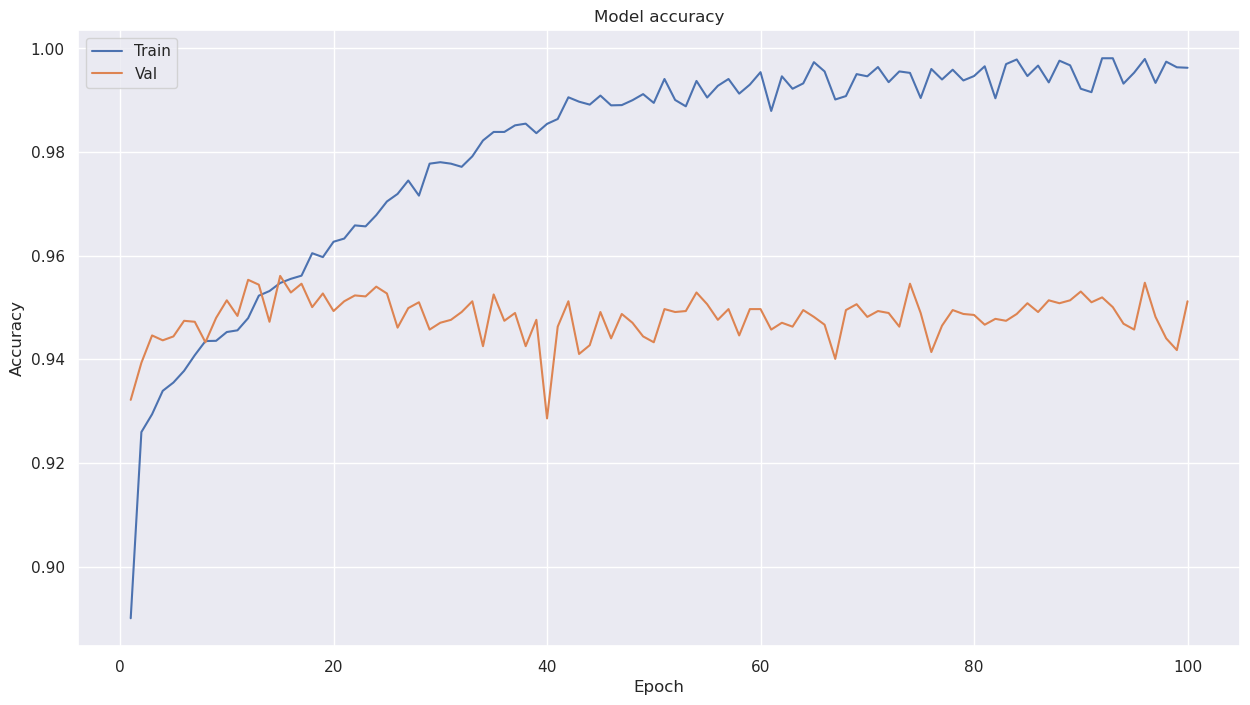

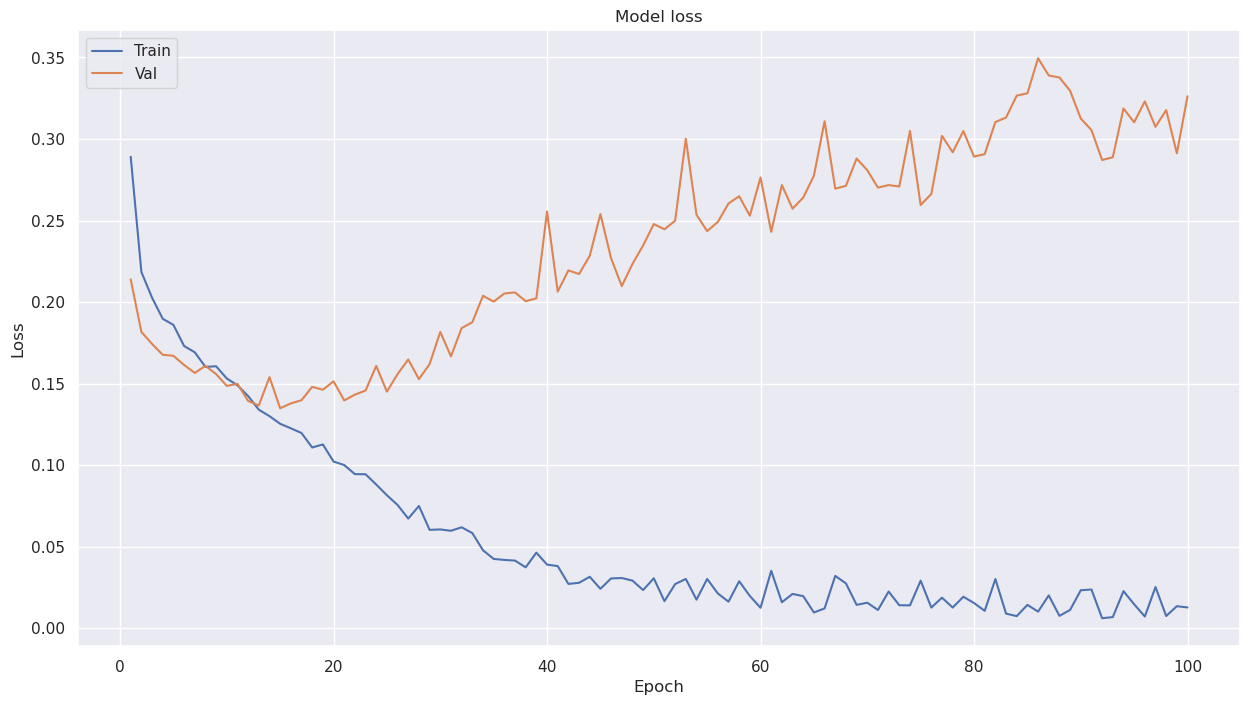

In [45]:
plot_learningCurve(history, epochSize)

<h2><b>Results</b></h2>

### Confusion Matrix

166/166 [==============================] - 1s 5ms/step
Prediction time: 1.0572881698608398 seconds


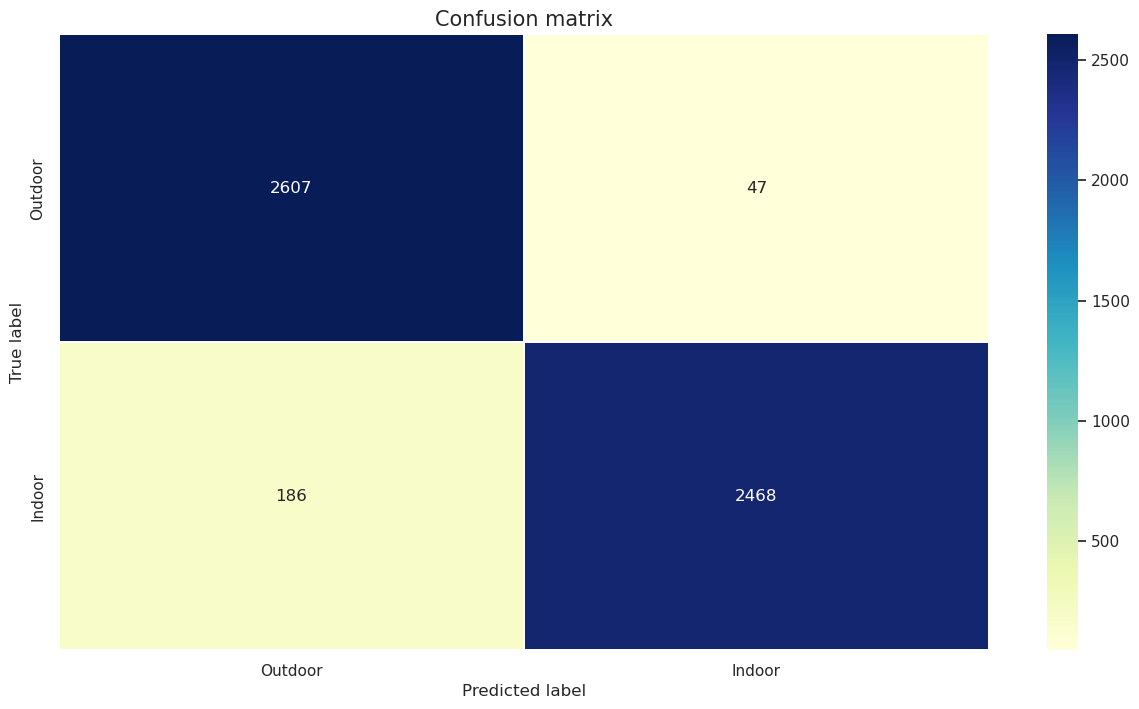

In [46]:
import time
class_labels = ['Outdoor', 'Indoor']
# Measure the time it takes to predict a single sample
start_time = time.time()
predict_x=saved_model.predict(X_test)
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print('Prediction time:', prediction_time, 'seconds')

# y_pred = model.predict_classes(X_test)
y_pred=np.argmax(predict_x,axis=1)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#plot_confusion_matrix(conf_mat=mat, classes = label.classes_, show_normed=True, figsize=(7,7))


### Classification Report

In [47]:
results = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [48]:
print("The Testing Accuracy of the model:            {} %".format(accuracy_score(y_test, y_pred)*100))
print(f'\nThe Precision of the given model is:   {results[0]*100} %')
print(f'\nThe Recall of the given model is:      {results[1]*100} %')
print(f'\nThe F1-score of the given model is:    {results[2]*100} %')

The Testing Accuracy of the model:            95.6103993971364 %

The Precision of the given model is:   95.73585340801593 %

The Recall of the given model is:      95.6103993971364 %

The F1-score of the given model is:    95.6073871493084 %


<h2><b>Lite Version</h2></b>

## Load Trained Model 

In [5]:
from keras.models import load_model
import numpy as np
import time
# Load the saved model
trained_model = load_model(model_Path + 'trainedModel_MAGNET_CNN_LSTM_V1.h5')

# Load Test Data 
X_test = np.loadtxt('X_test.csv', delimiter=',').reshape((-1,80,9))
y_test = np.loadtxt('y_test.csv',delimiter=',')

# Evaluate the model on the test set
test_loss, test_acc = trained_model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy:', test_acc)

# Measure the time it takes to predict a single sample
start_time = time.time()
predict_x = trained_model.predict(X_test)
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print('Prediction time:', prediction_time, 'seconds')


Test accuracy: 0.9561039805412292
166/166 [==============================] - 1s 5ms/step
Prediction time: 1.0398643016815186 seconds


In [50]:
results = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [51]:
print("The Testing Accuracy of the model:     {} %".format(accuracy_score(y_test, y_pred)*100))
print(f'\nThe Precision of the given model is:   {results[0]*100} %')
print(f'\nThe Recall of the given model is:      {results[1]*100} %')
print(f'\nThe F1-score of the given model is:    {results[2]*100} %')

The Testing Accuracy of the model:     95.6103993971364 %

The Precision of the given model is:   95.73585340801593 %

The Recall of the given model is:      95.6103993971364 %

The F1-score of the given model is:    95.6073871493084 %


# Convert Trained Model to Lite Version

In [7]:
import tensorflow

# Convert the model to a TFLite model
try:
    converter = tensorflow.lite.TFLiteConverter.from_keras_model(trained_model)
    tflite_model = converter.convert()
except:
    # Convert the model to a TFLite model
    converter = tensorflow.lite.TFLiteConverter.from_keras_model(trained_model)
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
    converter.experimental_new_converter = True
    converter.experimental_enable_resource_variables = True
    converter._experimental_lower_tensor_list_ops = False  # Set this flag to False
    tflite_model = converter.convert()


INFO:tensorflow:Assets written to: /tmp/tmpiy_ja746/assets


INFO:tensorflow:Assets written to: /tmp/tmpiy_ja746/assets
2023-04-24 17:44:46.501082: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-04-24 17:44:46.501114: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-04-24 17:44:46.501221: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpiy_ja746
2023-04-24 17:44:46.505791: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-04-24 17:44:46.505810: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpiy_ja746
2023-04-24 17:44:46.528636: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-04-24 17:44:46.573825: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmpiy_ja746
2023-04-24 17:44:46.597893: I tensorflow/cc/saved_model/loader.cc:305] SavedModel

INFO:tensorflow:Assets written to: /tmp/tmphaf8za5g/assets


INFO:tensorflow:Assets written to: /tmp/tmphaf8za5g/assets
2023-04-24 17:44:50.139756: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-04-24 17:44:50.139784: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-04-24 17:44:50.139890: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmphaf8za5g
2023-04-24 17:44:50.144438: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-04-24 17:44:50.144453: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmphaf8za5g
2023-04-24 17:44:50.166722: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-04-24 17:44:50.211432: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmphaf8za5g
2023-04-24 17:44:50.235092: I tensorflow/cc/saved_model/loader.cc:305] SavedModel

## Save Lite Version of Trained Model

In [8]:
# Save the TFLite model to a file
with open(model_Path + 'trainedModelLite_MAGNET_CNN_LSTM_V1.tflite', 'wb') as f:
    f.write(tflite_model)

try:
    # load the model from a file
    test_load_lite_model = tf.lite.Interpreter(model_Path + 'trainedModelLite_MAGNET_CNN_LSTM_V1.tflite')
    print("Lite Version of Trained Model saved and loaded successfully !!!")
    
except:
    print("Lite Version of Trained Model is not saved successfully !!!")

Lite Version of Trained Model saved and loaded successfully !!!


INFO: Created TensorFlow Lite delegate for select TF ops.
2023-04-24 17:44:56.012955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-24 17:44:56.013159: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO: TfLiteFlexDelegate delegate: 2 nodes delegated out of 42 nodes with 2 partitions.



## Load Lite Version of Trained Model

In [9]:
import tensorflow as tf

# Load the TensorFlow Lite model.
trained_Model_Lite_Path = model_Path + 'trainedModelLite_MAGNET_CNN_LSTM_V1.tflite'
interpreter = tf.lite.Interpreter(model_path=trained_Model_Lite_Path)
interpreter.allocate_tensors()

# Get input and output details.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print model summary.
print('Input shape:', input_details[0]['shape'])
print('Input type:', input_details[0]['dtype'])
print('Output shape:', output_details[0]['shape'])
print('Output type:', output_details[0]['dtype'])

Input shape: [ 1 80  9]
Input type: <class 'numpy.float32'>
Output shape: [1 2]
Output type: <class 'numpy.float32'>


2023-04-24 17:44:58.711846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-24 17:44:58.712036: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## Evaluation of Lite Version of Trained Model 

2023-04-24 17:45:02.368174: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-24 17:45:02.368320: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Accuracy: 95.61%


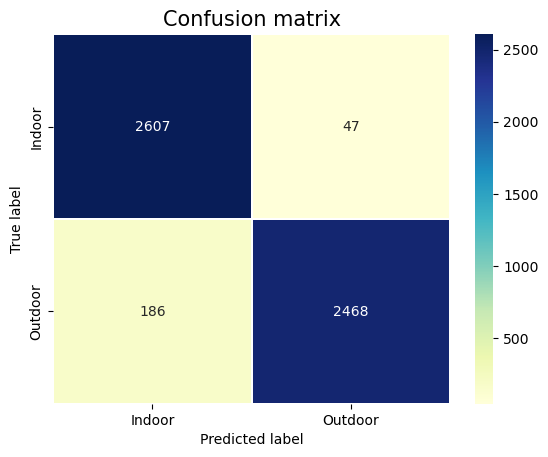

In [10]:
import tensorflow as tf
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TensorFlow Lite model.
interpreter = tf.lite.Interpreter(trained_Model_Lite_Path)
interpreter.allocate_tensors()

# Get the input and output details.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load the test data.
X_test = X_test 
y_test = y_test

# Test the model on the test data.
correct = 0
y_pred = []

for i in range(len(X_test)):
    # Preprocess the input data.
    input_data = X_test[i].astype(np.float32)
    input_data = np.expand_dims(input_data, axis=0)

    # Set the input tensor.
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference.
    interpreter.invoke()

    # Get the output tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data)
    # Check if the prediction is correct.
    if prediction == y_test[i]:
        correct += 1
    y_pred.append(prediction)

accuracy = correct / len(X_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Convert y_test from one-hot encoded array to 1D array of labels.
y_test_labels = np.argmax(np.expand_dims(y_test, axis=0), axis=1)


# confusion matrix
LABELS = [
    'Indoor',
    'Outdoor'
] 
class_labels = LABELS
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



## Comparison of Trained Model and Lite Version of Trained Model

In [11]:
print("Comparison of Trained Model and Lite Version of Trained Model :")
test_Accuracy_Trained_Model =  (test_acc*100)
test_Accuracy_Trained_Model_Lite = accuracy * 100
print("Trained Model (Full) - Test Accuracy: %.2f%%" % (test_Accuracy_Trained_Model))
print("Trained Model (Lite) - Test Accuracy: {:.2f}%".format(test_Accuracy_Trained_Model_Lite))


Comparison of Trained Model and Lite Version of Trained Model :
Trained Model (Full) - Test Accuracy: 95.61%
Trained Model (Lite) - Test Accuracy: 95.61%
